In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [3]:
wine_df= pd.read_csv('winequality-red.csv')
print("Dataset shape :",wine_df.shape)
wine_df.head()

Dataset shape : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

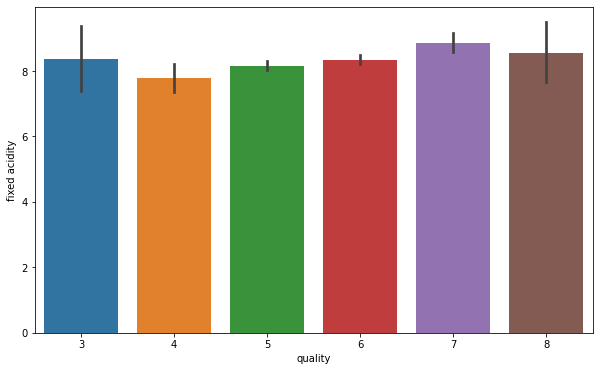

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

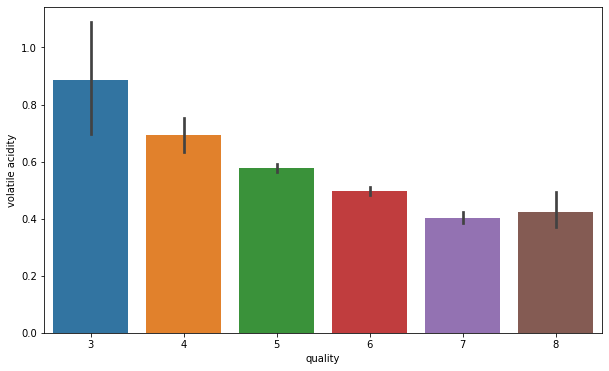

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

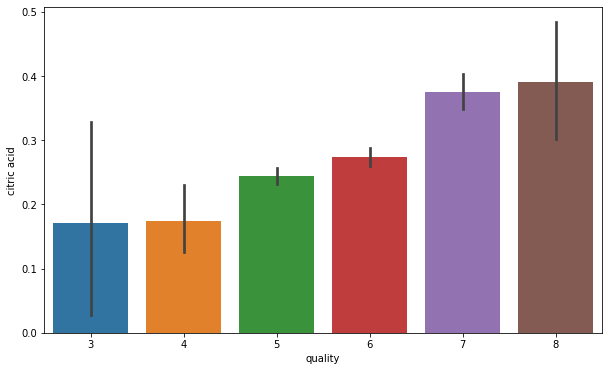

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

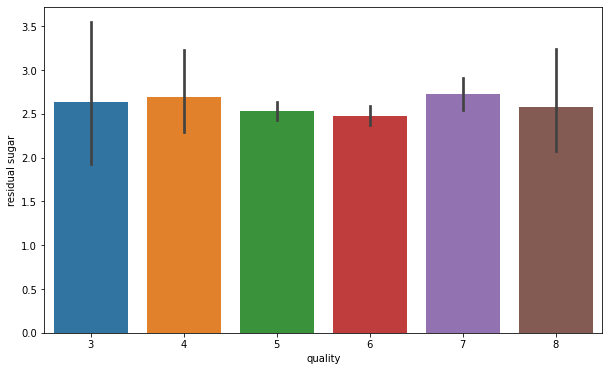

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

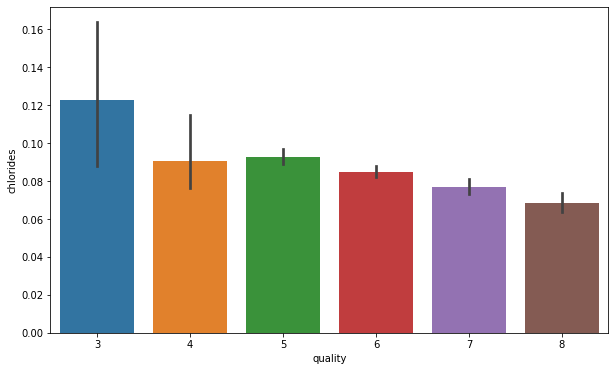

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

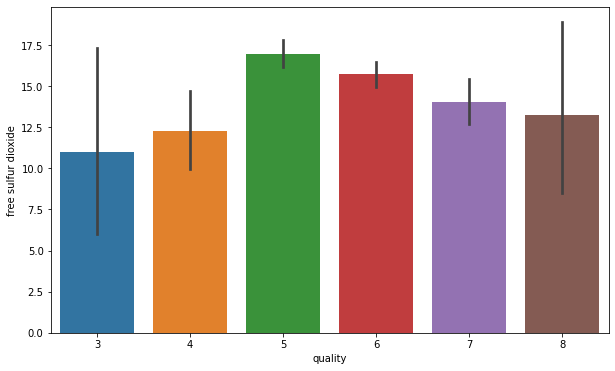

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

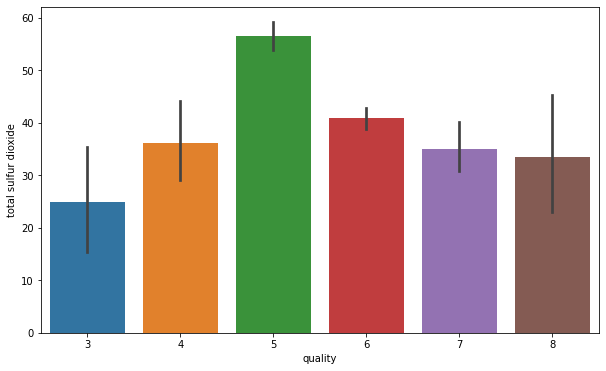

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

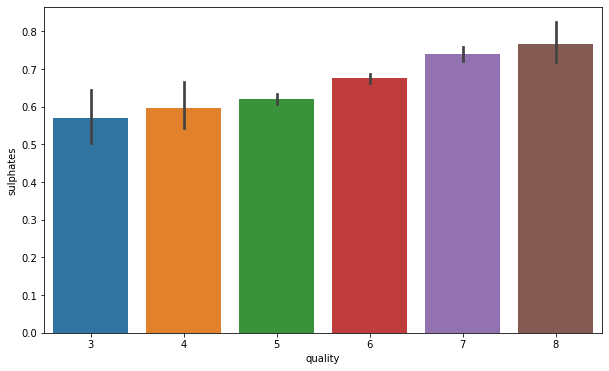

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

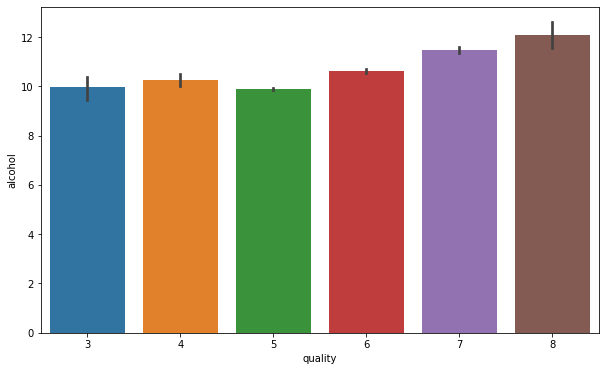

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

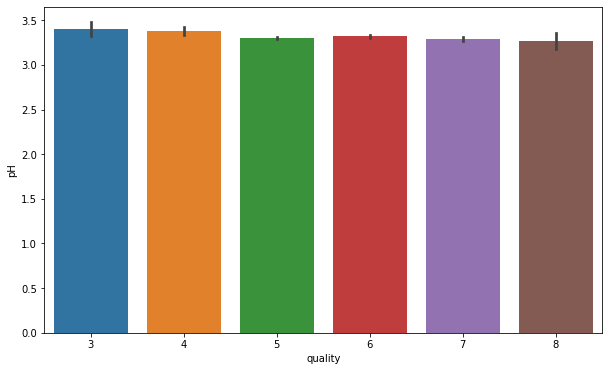

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=wine_df)

In [16]:
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x>6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


c:\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

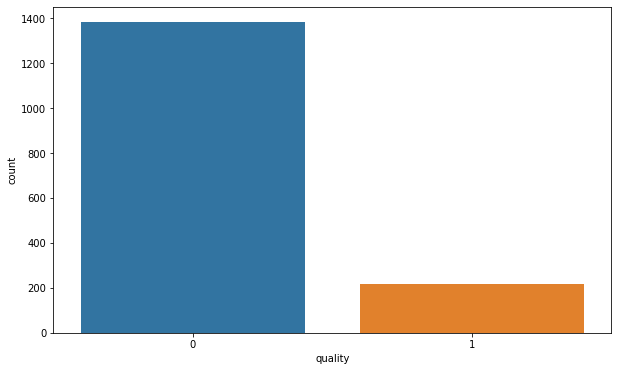

In [17]:
print(wine_df['quality'].value_counts())

fig=plt.figure(figsize = (10,6))
sns.countplot(wine_df['quality'])

In [19]:
x = wine_df.iloc[:,:-1].values
y = wine_df.iloc[:,-1].values

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =42)

print("x-train shape :",x_train.shape)
print("x-test shape :",x_test.shape)
print("y-train shape :",y_train.shape)
print("y-test shape :",y_test.shape)

x-train shape : (1279, 11)
x-test shape : (320, 11)
y-train shape : (1279,)
y-test shape : (320,)


In [22]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
rf_regressor = RandomForestClassifier(n_estimators = 100)
rf_regressor.fit(x_train,y_train)
y_pred = rf_regressor.predict(x_test)

[[263  10]
 [ 28  19]]


<Figure size 720x432 with 0 Axes>

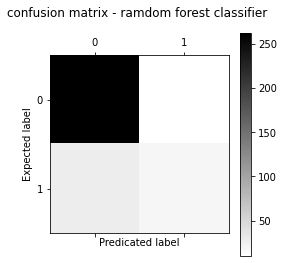

In [32]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

fig =plt.figure(figsize =(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation ='nearest')
plt.title("confusion matrix - ramdom forest classifier \n")
plt.colorbar()
plt.ylabel("Expected label")
plt.xlabel("Predicated label")
plt.show()

In [33]:
print("total predication= ",len(y_pred))
print("correct predication= ",len(y_pred == y_test))
print("Incorrect predication= ",len(y_pred != y_test))
print("Accurancy = ",sum(y_pred == y_test)*100/len(y_pred),"%")


total predication=  320
correct predication=  320
Incorrect predication=  320
Accurancy =  88.125 %


In [35]:
svc_regressor =SVC()
svc_regressor.fit(x_train,y_train)
y_pred = svc_regressor.predict(x_test)

[[268   5]
 [ 35  12]]


<Figure size 720x432 with 0 Axes>

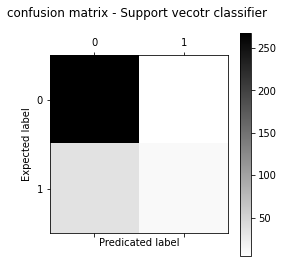

In [36]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

fig =plt.figure(figsize =(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation ='nearest')
plt.title("confusion matrix - Support vecotr classifier \n")
plt.colorbar()
plt.ylabel("Expected label")
plt.xlabel("Predicated label")
plt.show()

In [37]:
print("total predication= ",len(y_pred))
print("correct predication= ",len(y_pred == y_test))
print("Incorrect predication= ",len(y_pred != y_test))
print("Accurancy = ",sum(y_pred == y_test)*100/len(y_pred),"%")


total predication=  320
correct predication=  320
Incorrect predication=  320
Accurancy =  87.5 %
